# Plot FVCOM input and output files
**Author: Jun Sasaki Coded: 2024-12-26 Updated: 2025-04-18**<br>
Plot and check FVCOM input & output netCDF and text files using xfvcom with matplotlib.

In [1]:
import xarray as xr
import os
from xfvcom import FvcomDataLoader, FvcomAnalyzer, FvcomPlotConfig, FvcomPlotter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from math import ceil

from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    print("This cell is skipped.")

png_dir = "PNG"
os.makedirs(png_dir, exist_ok=True)

## Plot output netcdf

In [2]:
base_path = "~/Github/TB-FVCOM/goto2023/output"
base_path = os.path.expanduser(base_path)
ncfiles = ["TokyoBay18_r16_crossed_0001.nc"]
idx_ncfiles=0
ncfile_path = f"{base_path}/{ncfiles[idx_ncfiles]}"
ofc = FvcomDataLoader(ncfile_path=ncfile_path, time_tolerance=5)
ofc.ds

Dataset loaded successfully from /home/teem/Github/TB-FVCOM/goto2023/output/TokyoBay18_r16_crossed_0001.nc


<xarray.Dataset> Size: 1GB
Dimensions:    (nele: 5645, node: 3210, siglay: 30, siglev: 31, three: 3,
                time: 72, maxnode: 11, maxelem: 9, four: 4, dim_0: 5645,
                dim_1: 3)
Coordinates:
    x          (node) float64 26kB ...
    y          (node) float64 26kB ...
    lon        (node) float64 26kB 139.8 139.8 139.8 139.8 ... 139.8 139.9 139.8
    lat        (node) float64 26kB 35.65 35.65 35.65 35.65 ... 34.99 34.99 34.99
    lonc       (nele) float64 45kB 139.8 139.8 139.8 139.8 ... 139.9 139.8 139.9
    latc       (nele) float64 45kB 35.65 35.65 35.65 35.65 ... 35.0 34.99 34.99
    siglay     (siglay, node) float64 770kB ...
    siglev     (siglev, node) float64 796kB ...
  * time       (time) datetime64[ns] 576B 2020-01-01T01:00:00 ... 2020-01-12T...
Dimensions without coordinates: nele, node, three, maxnode, maxelem, four,
                                dim_0, dim_1
Data variables: (12/41)
    nprocs     int32 4B ...
    partition  (nele) int32 23kB ...
    xc         (nele) float64 45kB ...
    yc         (nele) float64 45kB ...
    h          (node) float64 26kB ...
    nv         (three, nele) int32 68kB ...
    ...         ...
    q2l        (time, siglev, node) float64 57MB ...
    l          (time, siglev, node) float64 57MB ...
    z          (time, siglay, node) float64 55MB -0.0719 -0.0666 ... -3.88
    z_dfs      (time, siglay, node) float64 55MB 0.07187 0.06657 ... 3.749 3.737
    nv_zero    (dim_0, dim_1) int32 68kB 1 2 0 0 2 ... 3207 3206 3209 3206 3208
    nv_ccw     (nele, three) int32 68kB 0 2 1 3 2 0 ... 3207 3209 3208 3206 3209
Attributes: (12/14)
    title:                       TokyoBay18_r16_crossed
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.4.7
    history:                     model started at: 20/11/2024   18:52
    references:                  http://fvcom.smast.umassd.edu, https://githu...
    Conventions:                 CF-1.0
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: Model surfa...
    River_Forcing:               THERE ARE 22 RIVERS IN THIS MODEL.\nRIVER IN...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

### Time series plot for `varname(time, idx, k)`
Specify `var_name`, node/nele/nobc number `idx`, and siglay/siglev number `k` (optional).

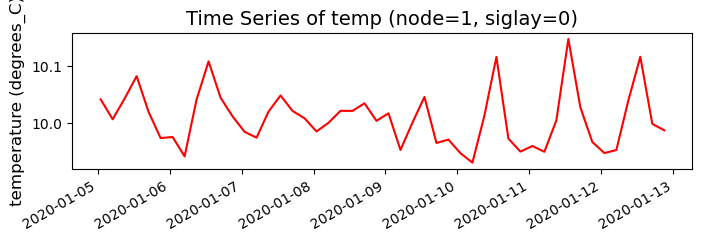

In [3]:
#%%skip
varname = 'temp'
# start=None; end=None
xlim=('2020-01-05',None)
ylim=None #(None, None)
idx=1  # node or nele number
k=0 # siglay or siglev number
pngfile = os.path.join(png_dir, f"{varname}_{xlim[0]}_{xlim[1]}")

plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(ofc.ds, plot_config)
da = ofc.ds[varname]
fig, ax = plotter.ts_plot(da, index=idx, k=k, xlim=xlim, ylim=ylim, xlabel='')
fig.savefig(pngfile, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

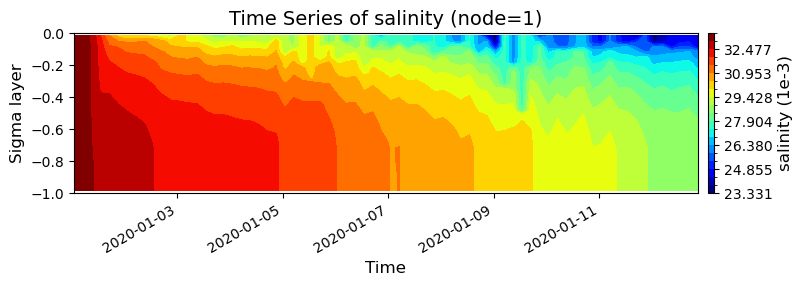

In [12]:
varname = 'salinity'
start=None; end=None
#start='2020-01-05'; end=None
xlim=(None, None)
ylim=(-1, 0)
idx=1  # node or nele number
pngfile = os.path.join(png_dir, f"{varname}_node-{idx}_{xlim[0]}_{xlim[1]}")

plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(ofc.ds, plot_config)
#da = ofc.ds[varname].isel(node=idx)
fig, ax, cbar = plotter.ts_contourf(ofc.ds[varname], index=idx, xlim=xlim, ylim=ylim)
fig.savefig(pngfile, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

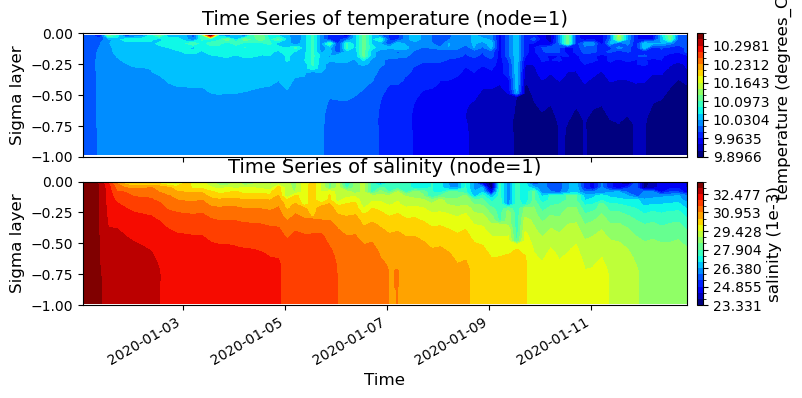

In [15]:
idx=1
xlim=(None, None)
ylim=(-1,0)
pngfile = os.path.join(png_dir, f"subplots")
plot_config = FvcomPlotConfig()
plotter = FvcomPlotter(ofc.ds, plot_config)
fig, ax = plt.subplots(2,1, figsize=(8,4))
fig, ax[0], cbar = plotter.ts_contourf(ofc.ds['temp'], index=idx, xlim=xlim, ylim=ylim, ax=ax[0])
fig, ax[1], cbar = plotter.ts_contourf(ofc.ds['salinity'], index=idx, xlim=xlim, ylim=ylim, ax=ax[1])

In [ ]:
plotter = FvcomPlotter(ofc.ds, plot_config)
var_name = 'temp'
save_path = f"plot_{var_name}.png"
ax=plotter.plot_timeseries_2d(var_name, index=idx, start=start, end=end, ylim=(-4,1), depth=True,
                              #levels=[9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15],
                              rolling_window=0, cmap="coolwarm", vmin=None, vmax=10.2,
                              method='contourf', add_contour=False, label_contours=False,
                              save_path=save_path)

## Plot input netcdf files

In [ ]:
base_path = "~/Github/TB-FVCOM/goto_dye/input/input_steady/2020"
base_path = os.path.expanduser(base_path)
ncfiles = ["TokyoBay18_2020_wnd.nc","TokyoBay2020final_tsobc.nc", "TokyoBay2020julian_obc.nc",
           "TokyoBay2020kisarazufinal_sewer.nc", "TokyoBay2020final_river.nc",
           "TokyoBay2020final_sewer.nc"]
index_ncfiles=0
ncfile_path = f"{base_path}/{ncfiles[index_ncfiles]}"
fvcom = FvcomDataLoader(ncfile_path=ncfile_path, time_tolerance=5)
fvcom.ds

In [ ]:
start='2020-01-01'; end='2020-01-20'

In [ ]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(fvcom.ds, plot_config)
var_name = 'elevation'
save_path = f"plot_{var_name}.png"
plotter.plot_timeseries(var_name, 1, start=start, end=end, save_path=save_path)

In [ ]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(fvcom.ds, plot_config)
# ノード0の風速ベクトル時系列を2020年1月1日から12月31日までプロット
plotter.plot_wind_vector_timeseries(nele=0, start=start, end=end, rolling_window=25,
                                    save_path="wind_vector_plot.png"
                                   )

In [ ]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(fvcom.ds, plot_config)
ax=plotter.plot_timeseries('long_wave', index=0, start=start, end=end, rolling_window=25)

In [ ]:
analyzer=FvcomAnalyzer(fvcom.ds)
vars = analyzer.get_variables_by_dims(("time", "node"))
print(vars)

In [ ]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)

# HelperMixin のメソッドを利用
plotter.plot_timeseries_in_batches(
    plotter=plotter,
    vars=vars,
    index=0,
    batch_size=5,
    start=start,
    end=end,
    rolling_window=25,
    save_prefix="time_node"
)

In [ ]:
vars = analyzer.get_variables_by_dims(("time", "nele"))
print(vars)

In [ ]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)

# HelperMixin のメソッドを利用
plotter.plot_timeseries_in_batches(
    plotter=plotter,
    vars=vars,
    index=0,
    batch_size=5,
    start=start,
    end=end,
    rolling_window=25,
    save_prefix="time_nele"
)

In [ ]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)

plotter.plot_timeseries_for_river(
    var_name="river_flux",
    river_index=0,
    start=start,
    end=end,
    rolling_window=25,
    save_path="river_discharge.png"
)

In [ ]:
plot_config = FvcomPlotConfig(figsize=(8, 2))
plotter = FvcomPlotter(fvcom.ds, plot_config)
var_name='river_temp'
# HelperMixin のメソッドを利用
plotter.plot_timeseries_for_river_in_batches(
    plotter=plotter,
    var_name=var_name,
    batch_size=5,
    start=start,
    end=end,
    rolling_window=25,
    save_prefix=var_name
)

## Example for input netcdf files

In [ ]:
base_path = "~/Github/TB-FVCOM/goto2023/input"
base_path = os.path.expanduser(base_path)
ncfiles = ["TokyoBay_tsobc.nc", "TokyoBay_julian_obc.nc","TokyoBayfinal_river.nc", "TokyoBayfinal16_river.nc",
           "TokyoBay18_z0.nc", "TokyoBay18_wnd.nc",
           "TokyoBay2020final_sewer.nc"]
index_ncfiles=5
ncfile_path = f"{base_path}/{ncfiles[index_ncfiles]}"
print(f"ncfile_path={ncfile_path}")
ifc = FvcomDataLoader(ncfile_path=ncfile_path, time_tolerance=5)
ifc.ds

## Compare with meteorological data
- Needs to install metdata; see [GitHub](https://github.com/jsasaki-utokyo/metdata)

In [ ]:
from metdata import gwo

datetime_ini = "2020-01-01 00:00:00"
datetime_end = "2021-01-01 00:00:00"
stn = "Chiba"
base_path = "/mnt/c/dat/met/JMA_DataBase/GWO/Hourly/"

met = gwo.Hourly(datetime_ini=datetime_ini, datetime_end=datetime_end, stn=stn, dirpath=base_path)
met.df.head()  # pandas.DataFrame

In [ ]:
met_ds = xr.Dataset.from_dataframe(met.df)
met_ds = met_ds.rename_dims({"index": "time"}).rename_vars({"index": "time"})
met_ds

In [ ]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(met_ds, plot_config)
start='2020-01-01'; end='2020-01-31'
plotter.plot_wind_vector_timeseries(u_var='u', v_var='v', nele=None, start=start, end=end, rolling_window=1,
                                    save_path="wind_vector_plot.png")

In [ ]:
plot_config = FvcomPlotConfig(width=8, height=2)
plotter = FvcomPlotter(ifc.ds, plot_config)
# ノード0の風速ベクトル時系列を2020年1月1日から12月31日までプロット
plotter.plot_wind_vector_timeseries(nele=0, start=start, end=end, rolling_window=1,
                                    save_path="wind_vector_plot.png")